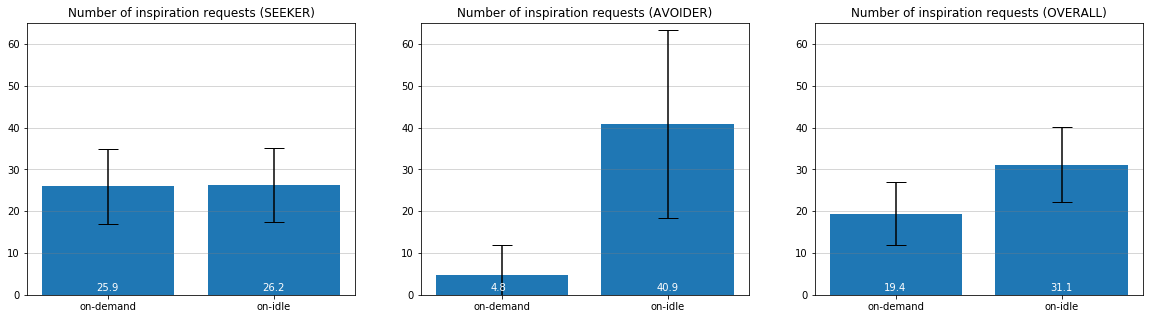

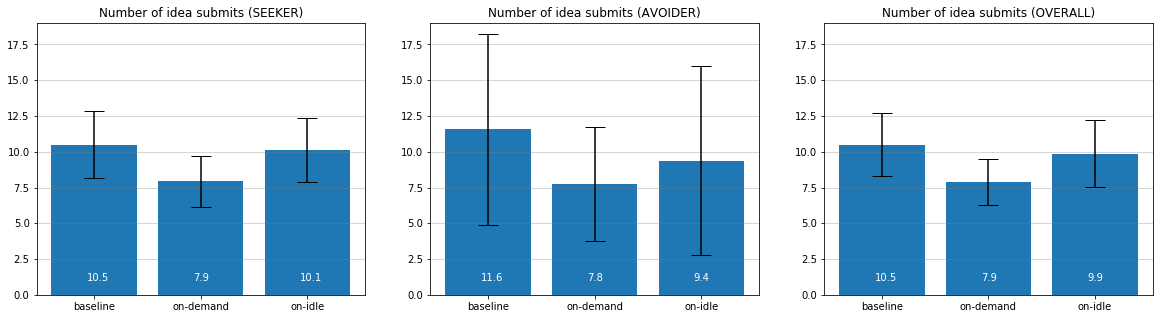

== FIRST SESSION ==
First session does not have a condition. It shows the same pattern as with condition. => Probably has nothing to do with conditions


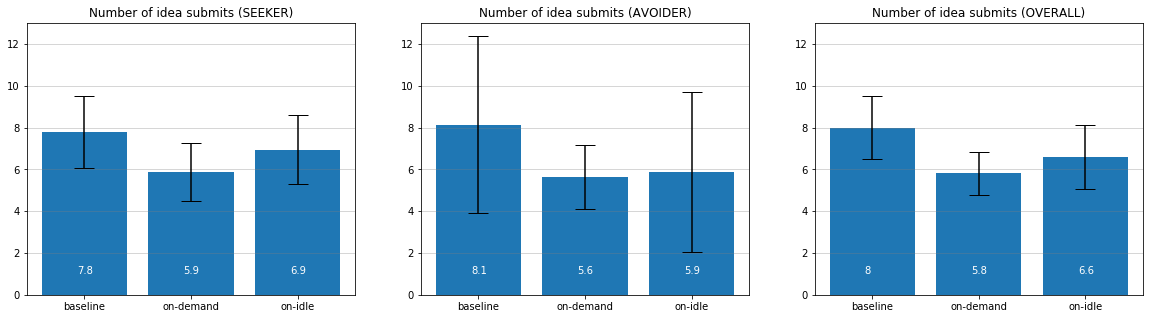

In [2]:
##########################
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.stats.api as sms

session_data = pd.read_json('iui20_mturk-sessions.json')
ideator_types = ['SEEKER', 'AVOIDER', 'OVERALL']
conditions = ['baseline','on-demand', 'on-idle']


def draw_bar_plot(attribute, conditions, y_max = None, session_number = 2):
    fig = plt.figure(figsize=(20, 5))
    for ideator_type_count, ideator_type in enumerate(ideator_types):
        requests_per_condition = []
        confidence_intervals = [[], []]
        for condition in conditions:
            df = session_data
            if ideator_type != 'OVERALL':
                df = df[df['session1_ideatorType'] == 'http://purl.org/innovonto/ideatorType/' + ideator_type]
            df = df[df['session2_condition'] == 'http://purl.org/innovonto/condition/' + condition]
            requests = df['session' + str(session_number) + '_numberOf' + attribute]
            if condition == 'on-idle' and attribute == 'Requests':
                requests = requests * 3
            mean = statistics.mean(requests)
            requests_per_condition.append(mean)
            confidence_interval = sms.DescrStatsW(requests).tconfint_mean()
            confidence_intervals[0].append(mean - confidence_interval[0])
            confidence_intervals[1].append(confidence_interval[1] - mean)

        fig.add_subplot(1,3,ideator_type_count+1)
        plt.bar(conditions, requests_per_condition, yerr = confidence_intervals, capsize = 10)
        plt.grid(axis='y', alpha = 0.4, color = "gray")
        title = None
        if attribute == 'Requests':
            title = 'inspiration requests'
        else:
            title = 'idea submits'
        plt.title('Number of '+ title +' (' + ideator_type + ')')
        if y_max != None: 
            plt.ylim(0, y_max)
        for i, v in enumerate(conditions):
            plt.text(i-.07, 
                  1, 
                  round(requests_per_condition[i],1), 
                  fontsize=10, 
                  color='white')
    plt.show()

draw_bar_plot(attribute = 'Requests', conditions = ['on-demand', 'on-idle'], y_max = 65)
draw_bar_plot(attribute = 'Submits', conditions = conditions, y_max = 19)

print('== FIRST SESSION ==')
print('First session does not have a condition. It shows the same pattern as with condition. => Probably has nothing to do with conditions')
draw_bar_plot(attribute = 'Submits', conditions = conditions, y_max = 13, session_number = 1)




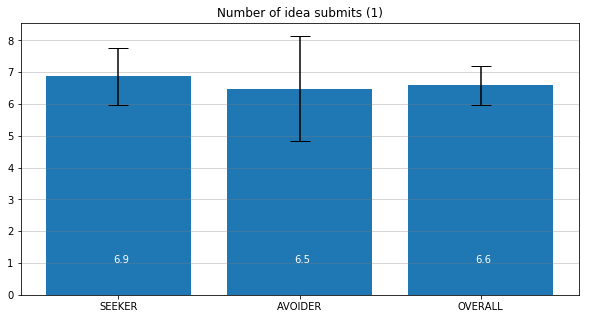

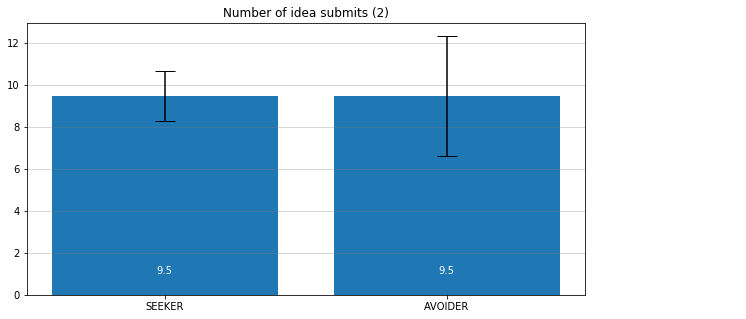

In [30]:
def draw_bar_plot_without_conditions(attribute, y_max = None, session_number = 2):
    ideator_types = ['SEEKER', 'AVOIDER', 'OVERALL']
    fig = plt.figure(figsize=(10, 5))
    requests_per_type = []
    confidence_intervals = [[], []]
    for ideator_type_count, ideator_type in enumerate(ideator_types):
        df = session_data
        if ideator_type != 'OVERALL':
            df = df[df['session1_ideatorType'] == 'http://purl.org/innovonto/ideatorType/' + ideator_type]
        else: 
            df = df[df['session1_ideatorType'] != 'http://purl.org/innovonto/ideatorType/UNMOTIVATED']
        requests = df['session' + str(session_number) + '_numberOf' + attribute]
        mean = statistics.mean(requests)
        requests_per_type.append(mean)
        confidence_interval = sms.DescrStatsW(requests).tconfint_mean()
        confidence_intervals[0].append(mean - confidence_interval[0])
        confidence_intervals[1].append(confidence_interval[1] - mean)

    plt.bar(ideator_types, requests_per_type, yerr = confidence_intervals, capsize = 10)
    plt.grid(axis='y', alpha = 0.4, color = "gray")
    title = None
    if attribute == 'Requests':
        title = 'inspiration requests'
    else:
        title = 'idea submits'
    plt.title('Number of '+ title + ' (' + str(session_number) + ')')
    if y_max != None: 
        plt.ylim(0, y_max)
    for i, v in enumerate(ideator_types):
        plt.text(i-0.03, 
              1, 
              round(requests_per_type[i],1), 
              fontsize=10, 
              color='white')
    plt.show()
    
draw_bar_plot_without_conditions('Submits', session_number = 1)
draw_bar_plot_without_conditions('Submits', session_number = 2)